Populating the interactive namespace from numpy and matplotlib
1.10.4
2.1.0
0.20.3
0.8.0
          PL Intensity (kCts/s)
Time (s)                       
38.860                    23.50
38.864                    22.50
38.868                    30.50
38.872                    24.50
38.876                    30.75


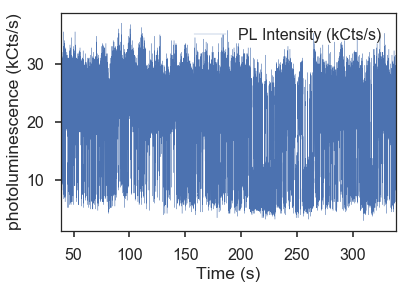

today: 2018-07-24


'O:\\User\\Viva\\analysis\\blinker_analysis\\taken-2018-06-01'

In [4]:
# -*- coding: utf-8 -*-
"""
Created on July 24, 2018

Blinker analysis

@author: Viva Horowitz
"""

import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # default params
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
import numpy as np
from timeit import default_timer as timer
sns.set(style='ticks')
sns.set_context('poster')
from __future__ import division # division should return float
from os.path import join

%pylab inline

print(np.__version__)
print(mpl.__version__)
print(pd.__version__)
print(sns.__version__)

# ** set for each dataset
datadate = '2018-06-01'
datafolder = r'O:\User\Viva\data'
filename = join('2018-06-01_blinking-statistics','4-22-2018.11,00am','4-22-2018.11,00am, 06, ND2,0.txt')
analysisfolder = r'O:\User\Viva\analysis\blinker_analysis'

os.chdir(datafolder)

tname = 'Time (s)'
PLname = 'PL Intensity (kCts/s)'
data = pd.read_csv(filename,
                   skiprows=1,
                   header=None,
                   sep='\t',
                   names=['Time (s)','PL Intensity (kCts/s)'],
                   usecols=[0,1])
data = data.set_index(tname)
print(data.head())
rebincount = 0

data.plot(linewidth=0.3)
plt.ylabel('photoluminescence (kCts/s)')
plt.show()

filename = filename.replace('\\','-')
filename = filename.replace('/','-')
origfilename = filename
os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

print('today: '+today)
os.getcwd()

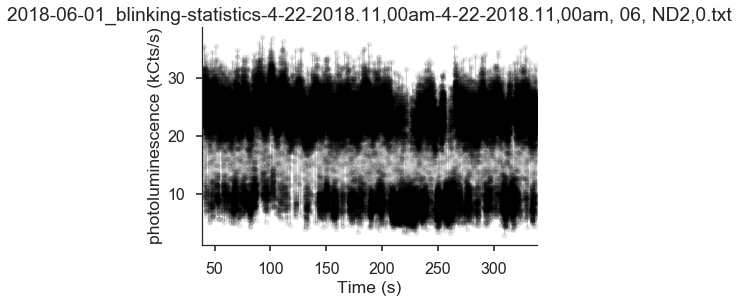

Collection rate: 250.0 Hz
Time bin size: 0.004 sec


In [5]:
fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, linewidth=0.5, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

sns.despine()
plt.savefig(today + ',' + filename+',blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+',blinking.png', bbox_inches='tight', dpi=200)

plt.show()

def arangebylength(start, step, length):
    return np.arange(start = start, stop=start+step*(length-.5), step = step )

# rebin: combine two rows into one.
def rebindata(data, colname=PLname, indexname = tname):
    first = 1 # this is a value that indicates if we're on the first (=1) or the second (-1) of a pair of two bins
    rebinvals = []

    for value in data[colname]:
        if first == 1:
            prevval = value
        else:
            # calculate average of the two bins
            combined = (prevval + value) /2.0 
            rebinvals.append(combined)
            del prevval
        first = -1 * first
        
    timesetting = data.index[1]-data.index[0]
    rebintimes = arangebylength(start =0, step = timesetting*2, length = len(rebinvals) )
    rebinneddata = pd.DataFrame(data = rebinvals, index = rebintimes, columns =[colname])
    rebinneddata.index.name=indexname
    return rebinneddata

# The data was collected at a particular rate
timesetting = data.index[1]-data.index[0]
fps = 1/timesetting
print('Collection rate: ' + str(fps) + ' Hz')
print('Time bin size: ' + str(timesetting) + ' sec')

1
Effective collection rate: 125.0 Hz
Time bin size: 0.008 sec


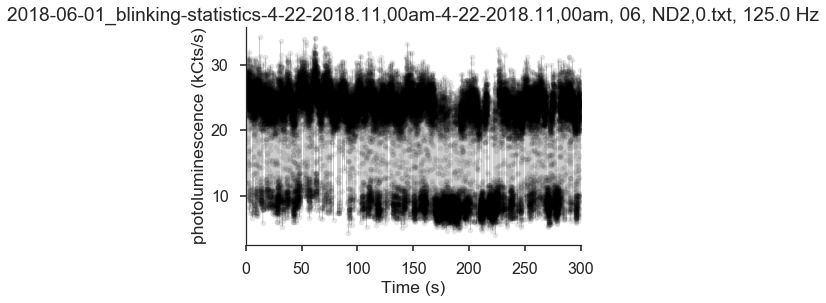

In [7]:
# *** run this an appropriate number of times, can skip if not rebinning

n = 1 # number of times to rebin.

for i in range(n):
    data = rebindata(data)
    rebincount = rebincount + 1
    print(rebincount)

timesetting = data.index[1]-data.index[0]
fps = 1/timesetting
print('Effective collection rate: ' + str(fps) + ' Hz')
print('Time bin size: ' + str(timesetting) + ' sec')
filename = origfilename + ', ' + str(fps) + ' Hz'


fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, linewidth=0.5, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

sns.despine()
#plt.savefig(today + ',' + filename+',blinking.pdf', bbox_inches='tight')
#plt.savefig(today + ',' + filename+',blinking.png', bbox_inches='tight', dpi=200)

plt.show()

49 bins


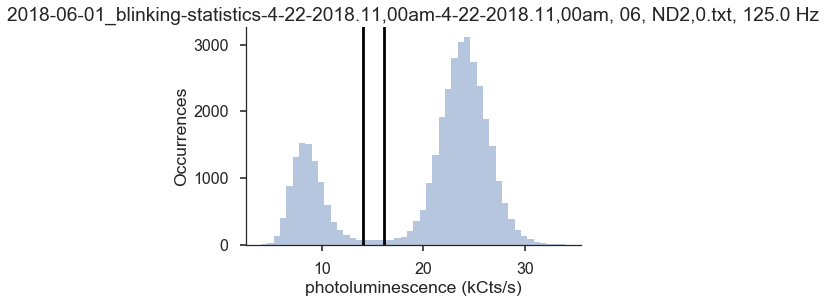

In [12]:
binsequence = np.arange(data.min(), data.max(), fps/200)# ** adjust bins as needed. Higher denominator: more bins
print (str(len(binsequence)) + ' bins')

#data.hist(bins= binsequence)
sns.distplot(data, bins=binsequence, kde=False, rug=False, kde_kws={'bw':.5, 'label':'KDE'}, norm_hist=False); # must norm if KDE
plt.xlabel('photoluminescence (kCts/s)')
#plt.locator_params(axis='x', nbins=10)
ax = plt.gca()

# ** Need to pick an appropriate threshold between on and off for each dataset
uthreshold = 16.1
lthreshold = uthreshold-2

ax.axvline(x=uthreshold, color='k')
ax.axvline(x=lthreshold, color = 'k')
#ax.tick_params(axis='x',which='minor',bottom='on')
#ax.xaxis.set_minor_locator(minorLocator)

plt.title(filename)
plt.ylabel('Occurrences')
sns.despine()

#plt.savefig(today + ',' + filename+',PLhistogram.pdf', bbox_inches='tight')
#plt.savefig(today + ',' + filename+',PLhistogram.png', bbox_inches='tight', dpi=200)

plt.show()

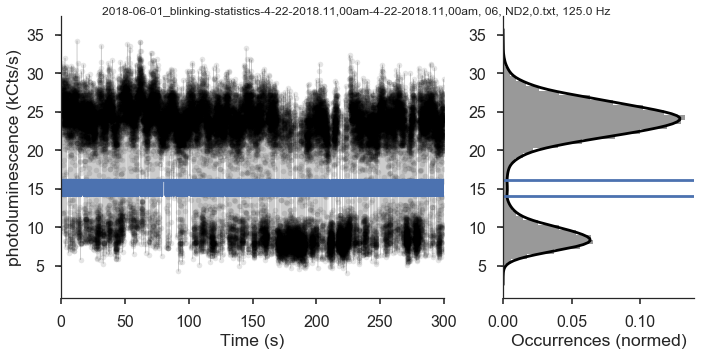

In [13]:
# With an uthreshold and an lthreshold
# This code has an in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either. 
# This seems like the most straightforward way to deal with (rare) cases in between.
# Other options are shown.


threshdata = data[PLname].clip(upper=uthreshold, lower=lthreshold)


fig2,[axPL,axhist] = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True, gridspec_kw = {'width_ratios':[4,2]})
data.plot(marker='.',linestyle='None',legend=False, alpha=0.1, ax=axPL, color='k')
data.plot(legend=False, linewidth=0.5, alpha=0.2, ax=axPL, color='k')
threshdata.plot(legend=False, ax=axPL)
axPL.set_ylabel('photoluminescence (kCts/s)')
axPL.set_xlabel(tname)
plt.suptitle(filename)
sns.despine()
plt.tight_layout() 

sns.distplot(data, bins=binsequence, kde=True, rug=False, ax=axhist, vertical=True, color='k',
             kde_kws={'bw':.5});
#             kde_kws={'bw':.5, 'label':'Kernal density\nestimate (KDE)'});
#axhist.set_xlabel('photoluminescence (kCts/s)')
axhist.set_xlabel('Occurrences (normed)')
axhist.axhline(y=uthreshold)
axhist.axhline(y=lthreshold)

plt.savefig(today + ',' + filename+',blinkingandthreshold.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+',blinkingandthreshold.png', bbox_inches='tight', dpi=200)

plt.show();

In [14]:
# Main method: in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either.
downtimes2= threshdata[threshdata != uthreshold].index
uptimes2=threshdata[threshdata != lthreshold].index

#print(uptimes2)
#print(downtimes2)

# Alternate option (not used)
uptimes= threshdata[threshdata == uthreshold].index
downtimes=threshdata[threshdata == lthreshold].index

#print(uptimes)
#print(downtimes)

# We can compare the two ways of interpreting blinks.
# There is a discrepancy at about 22 seconds between the two interpretations. 
# It's a matter of whether we consider it stayed off or 
# if we consider that it came up enough to have ended the off blink and began another.
# I tend to think it ended one and began another in this case, so I'm going to use uptimesep2 as my off duration.

# subtracting each time from the last time we had the same state gives the amount of time it was not in that state.
# Therefore the separation between up times is in fact the duration of time off.
uptimesep = uptimes[1:] - uptimes[:-1]
uptimesep2 = uptimes2[1:] - uptimes2[:-1]

"""
plt.plot(uptimes[:-1],uptimesep, '.-')
plt.plot(uptimes2[:-1],uptimesep2, '-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink off (s)')
plt.figure()
data.plot()
plt.show()
"""

# We can compare the two ways of interpreting blinks. It looks like they mostly agree.

downtimesep = downtimes[1:] - downtimes[:-1]
downtimesep2 = downtimes2[1:] - downtimes2[:-1]

"""
plt.plot(downtimes[:-1],downtimesep,'.-')
plt.plot(downtimes2[:-1],downtimesep2,'-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink on (s)')
#plt.figure()
data.plot()
plt.show()
"""

# I chose to use downtimesep2 and uptimesep2, as detailed above.

ontimes = filter(lambda a: a > 1.5*timesetting, downtimesep2) # requires python 2
offtimes = filter(lambda a: a > 1.5*timesetting, uptimesep2)

# save analyzed data: bright state duration
ontimesdf = pd.DataFrame(ontimes, columns=["Bright state duration (s)"])
ontimesdf.to_csv(filename+' uptimes.csv', index=False, header=True)
print('Uptimes saved to: ')
print(os.path.join(os.getcwd(), filename+ ' uptimes.csv'))
# save analyzed data: dim state duration
offtimesdf = pd.DataFrame(offtimes, columns=["Dim state duration (s)"])
offtimesdf.to_csv(filename+' downtimes.csv', index=False, header=True)
print('Downtimes saved to: ')
print(os.path.join(os.getcwd(), filename+ ' downtimes.csv'))
## to open: 
# ontimesdf = pd.read_csv(filename+' ontimes.csv'
# offtimesdf = pd.read_csv(filename+' downtimes.csv')
#  # convert to list or else the rest of the code won't work.
# ontimes = list(ontimesdf['Bright state duration (s)'])
# offtimes = list(offtimesdf["Dim state duration (s)"])

## https://stackoverflow.com/questions/32765333/how-do-i-replicate-this-matlab-function-in-numpy/32765547#32765547
def histc(X, bins):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    return [r, map_to_bins]

def CDF(S):
    M = len(S); # size of array = number of elements
    sorteddata = sort(S); # ascending sort is CDF, descending sort is 1-CDF
    cum_prob = [elem/M for elem in range(M)] # probability integrated from 0 to sorteddata.
    cum_prob2 = [1-p for p in cum_prob] # probability integrated from sorteddata to inf
    return sorteddata,cum_prob2

def nonlinearhistc(X,bins, thresh=3, verbose = True):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    if verbose:
        print r 
        #print bins
    ## normalize by bin width
    probability = np.zeros(bins.shape)
    area = 0;
    thinbincount = 0
    for i in range(len(bins)-1):
        if r[i]<=1:
            thinbincount += 1;
        thisbinwidth = bins[i+1] - bins[i]
        probability[i] = r[i]/thisbinwidth
        area += probability[i]*thisbinwidth;
        
    if thinbincount > thresh:
        print("Warning: too many bins for data, thinbincount=" + str(thinbincount))
    elif verbose:
        print("thinbincount=" + str(thinbincount))
    ## normalize area.
    normedprobability = [eachprobability / area for eachprobability in probability]
    return normedprobability, map_to_bins


def correlationpair(sequence):
    pairs = [(sequence[i], sequence[i+1]) for i in range(len(sequence)-1)]
    x = [sequence[i] for i in range(len(sequence)-1)]
    y = [sequence[i+1] for i in range(len(sequence)-1)]
    return x,y


Uptimes saved to: 
O:\User\Viva\analysis\blinker_analysis\taken-2018-06-01\2018-06-01_blinking-statistics-4-22-2018.11,00am-4-22-2018.11,00am, 06, ND2,0.txt, 125.0 Hz uptimes.csv
Downtimes saved to: 
O:\User\Viva\analysis\blinker_analysis\taken-2018-06-01\2018-06-01_blinking-statistics-4-22-2018.11,00am-4-22-2018.11,00am, 06, ND2,0.txt, 125.0 Hz downtimes.csv


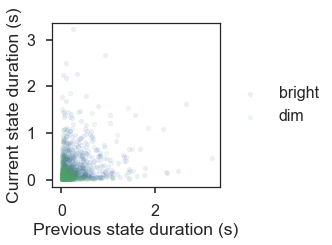

In [15]:
ontimesprev, ontimescurrent = correlationpair(ontimes)
offtimesprev, offtimescurrent = correlationpair(offtimes)
figure(figsize(3,3))
plt.scatter(ontimesprev, ontimescurrent, alpha=.1, label="bright", s=20)
plt.scatter(offtimesprev, offtimescurrent, alpha=.1, label="dim", s=20)
pylab.axis('equal')
#ylim(ymin=0, ymax = 2)
#xlim(xmin=0, xmax = 2)
ax = plt.gca()
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

xlabel('Previous state duration (s)')
ylabel('Current state duration (s)');

# could improve this by binning into a 2D histogram.
# maybe divide a smooth background to see if any bins are different.

In [17]:
"""plt.scatter(ontimes[:-1], offtimes, alpha=.2, label="dim", s=20)
xlabel('Bright state duration (s)')
ylabel('Dim state duration (s)')"""

'plt.scatter(ontimes[:-1], offtimes, alpha=.2, label="dim", s=20)\nxlabel(\'Bright state duration (s)\')\nylabel(\'Dim state duration (s)\')'

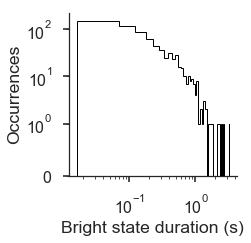

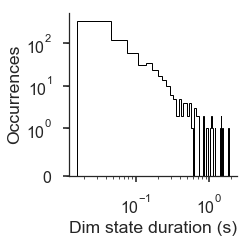

In [18]:
# ** Choose a nice number of bins to see how the data look.
# It's better to have as many bins as possible before the first empty bin.

numonbins = 60
numoffbins = 60

#plt.hist(ontimes, bins=numonbins, histtype='step', linewidth=1)
sns.distplot(ontimes, bins=numonbins, kde=False, rug=False, 
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"});
plt.xlabel('Bright state duration (s)')
plt.ylabel('Occurrences')
ax = plt.gca()
ax.set_yscale('symlog', linthreshy=1)
ax.set_xscale('log')
sns.despine()
plt.show()
#plt.hist(offtimes, bins=numoffbins, histtype='step', linewidth=1)
sns.distplot(offtimes, bins=numoffbins, kde=False, rug=False, 
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"});
plt.xlabel('Dim state duration (s)')
plt.ylabel('Occurrences')
ax = plt.gca()
ax.set_yscale('symlog', linthreshy=1)
ax.set_xscale('log')
sns.despine()
plt.show()

[ 25.  23.  26.  43.  36.  39.  58.  61.  69.  63.  57.  58.  63.  39.  35.
  12.  12.   3.   3.   0.]
thinbincount=0
[ 140.   98.   56.   40.   40.   53.   63.   32.   36.   44.   28.   19.
   12.   11.   10.    5.    6.    3.    4.    0.]
thinbincount=0


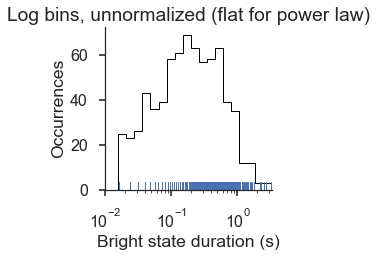

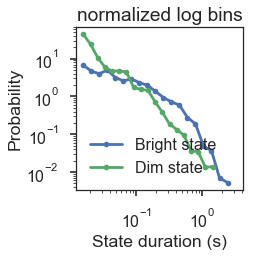

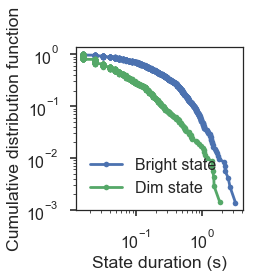

In [21]:
# logarithmic bins.

## ** choose number of bins
numonbins_log = 20
numoffbins_log = 20

small = 1e-4
onbins=np.logspace(np.log10(min(ontimes)-small),np.log10(max(ontimes)+small), numonbins_log)
offbins = np.logspace(np.log10(min(offtimes)-small),np.log10(max(offtimes)+small), numoffbins_log)

onfitx = np.logspace(np.log10(min(ontimes)),np.log10(max(ontimes)), numonbins_log*10)
offfitx = np.logspace(np.log10(min(offtimes)),np.log10(max(offtimes)), numoffbins_log*10)

#plt.hist(ontimes, bins=numonbins, histtype='step', linewidth=1)
sns.distplot(ontimes, bins=onbins, kde=False, rug=True, 
             hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"});
plt.xlabel('Bright state duration (s)')
plt.ylabel('Occurrences')
ax = plt.gca()
xlim(xmin=1e-2)
#ax.set_yscale('symlog', linthreshy=1)
ax.set_xscale('log')
sns.despine()
title('Log bins, unnormalized (flat for power law)' )

onprobs, _ = nonlinearhistc(ontimes, onbins) 
offprobs, _ = nonlinearhistc(offtimes, offbins)     
    
plt.figure()
plot(onbins,onprobs, '.-', label="Bright state");
plot(offbins,offprobs, '.-', label="Dim state");

gca().set_yscale('log')
gca().set_xscale('log')
title('normalized log bins')
plt.xlabel('State duration (s)')
plt.ylabel('Probability');
legend();

figure()
sortedontimes,CDFontimes=CDF(ontimes)
sortedofftimes,CDFofftimes=CDF(offtimes)
loglog(sortedontimes,CDFontimes, '.-', label='Bright state');
loglog(sortedofftimes,CDFofftimes, '.-', label='Dim state');
xlabel('State duration (s)');
ylabel('Cumulative distribution function');
legend();

In [22]:
from scipy.optimize import curve_fit
import scipy
import sympy
print(scipy.__version__)
print(sympy.__version__)
# need at least version 14.0 of scipy.

def expfit(t, A, tau):
    return (A * np.exp(t/(-tau)))

# integral from t to infinity of expfit
def CDFexp(t, A, tau):
    return A*tau*np.exp(-t/tau)

def powlaw(t, C, m):
    return C * t**(-m)

# integral from t to infinity of powlaw
def CDFpowlaw(t,C,m):
    return (C/(m-1)) * t**(-(m-1)) # https://arxiv.org/pdf/cond-mat/0412004.pdf

# truncated power law from  https://www.nature.com/articles/srep08898
def truncpow(t,C,m,tau):
    return(C * np.exp(t/(-tau)) * t**(-m))

def numericexpint(t, m):
        values = [sympy.N(sympy.expint(i,m)) for i in t]
        return np.array(values, dtype='float')

# integral from t to infinity of truncpow, possibly assuming m<1
def CDFtruncpow(t,C,m,tau):
    values = [C * tau * (ti**(-m)) * ((ti/tau)**m) * sympy.N(sympy.uppergamma(1-m,ti/tau))
              for ti in t]
    return np.array(values, dtype='float')

def logCDFtruncpow(t,C,m,tau):
    return log(CDFtruncpow(t,C,m,tau))

# conda install -c conda-forge lmfit
from lmfit import Model
import lmfit
print(lmfit.__version__)

expfitm = Model(expfit)
CDFexpm = Model(CDFexp)
powlawm = Model(powlaw)
CDFpowlawm = Model(CDFpowlaw)
truncpowm = Model(truncpow)
CDFtruncpowm = Model(CDFtruncpow)
logCDFtrucpowm = Model(logCDFtruncpow)

# Trying to find good guess
#onparamexp[1]=-.8
#onfitexp = 30 * np.exp(centeredonbins/(onparamexp[1]))

0.17.1
1.1.1
0.9.11


0.0285280398712
[[Model]]
    Model(powlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 101
    # data points      = 20
    # variables        = 2
    chi-square         = 30.0589070
    reduced chi-square = 1.66993928
    Akaike info crit   = 12.1485350
    Bayesian info crit = 14.1399996
[[Variables]]
    C:  0.00182752 +/- 9.4725e-04 (51.83%) (init = 2)
    m:  2.43509158 +/- 0.12820129 (5.26%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, m) = -0.999

OrderedDict([('C', 0.0018275150360951523), ('m', 2.4350915809789022)])


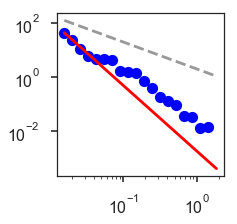

      99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 C:  -0.00162  -0.00133  -0.00082   0.00183  +0.00136  +0.00381  +0.00869
 m:  -0.43601  -0.27976  -0.13830   2.43509  +0.14722  +0.31874  +0.53877


In [24]:
#print(powlawm.param_names, powlawm.independent_vars)
start = timer()
powlawresult = powlawm.fit(data=offprobs, t=offbins, C=2,m=1)
end= timer()
print (end-start)
print(powlawresult.fit_report())
print(powlawresult.params.valuesdict())


plt.plot(offbins, offprobs, 'bo')
plt.plot(offbins, powlawresult.init_fit, 'k--', alpha=.4)
plt.plot(offbins, powlawresult.best_fit, 'r-')
ax1 = gca()
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.show()

print powlawresult.ci_report()
#print offparampow

[-4.14143617 -3.8909144  -3.64039262 -3.38987085 -3.13934908 -2.88882731
 -2.63830553 -2.38778376 -2.13726199 -1.88674022 -1.63621844 -1.38569667
 -1.1351749  -0.88465312 -0.63413135 -0.38360958 -0.13308781  0.11743397
  0.36795574  0.61847751]
[44.182692241067258, 24.074096236208927, 10.708082785330316, 5.9536522063197586, 4.6342903231310739, 4.7796807778855976, 4.4224542470681172, 1.748527849733257, 1.5311750820421357, 1.456715714023687, 0.72157243871262566, 0.38113188480985588, 0.18737114218495565, 0.13369461649579684, 0.094606507677225268, 0.036820594136183694, 0.034393138970957436, 0.013385715657527103, 0.013892490500539876, 0.0]
[ 3.78833313  3.18113642  2.37099886  1.78400485  1.53348307  1.56437376
  1.4866948   0.55877421  0.42603547  0.37618439 -0.32632251 -0.96460981
 -1.67466391 -2.01219706 -2.35802901 -3.30169797 -3.36989818 -4.31356714
 -4.27640684        -inf]


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


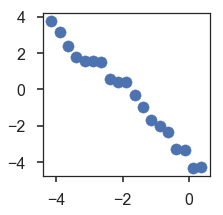

In [25]:
scatter(np.log(offbins), np.log(offprobs))

print np.log(offbins)
print offprobs
print np.log(offprobs)

[[Model]]
    Model(mylinear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 19
    # variables        = 2
    chi-square         = 2.01264462
    reduced chi-square = 0.11839086
    Akaike info crit   = -38.6547984
    Bayesian info crit = -36.7659205
[[Variables]]
    C: -3.59789394 +/- 0.13420859 (3.73%) (init = 2)
    m:  1.75274771 +/- 0.05752759 (3.28%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, m) = -0.809



C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


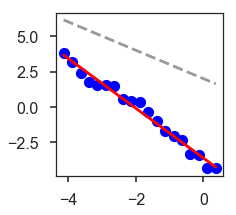

In [26]:
def mylinear(t, C, m):
    return -m * t + C
linearm = Model(mylinear)

powlaw2result = linearm.fit(data=np.log(offprobs)[:-1], t=np.log(offbins)[:-1], C=2,m=1)

plt.plot(np.log(offbins), np.log(offprobs), 'bo')
plt.plot(np.log(offbins)[:-1], powlaw2result.init_fit, 'k--', alpha=.4)
plt.plot(np.log(offbins)[:-1], powlaw2result.best_fit, 'r-')

print(powlaw2result.fit_report())

plt.show()

[0.35598774641973663, 0.5672299697959277, 0.8583834888765342]
2018-07-25


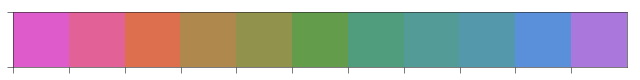

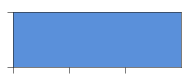

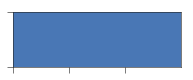

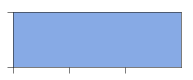

In [53]:
## colors from survey

palette=sns.husl_palette(11, h=0.88, l=0.6, s=.7)
sns.palplot(palette)
thisQEcolor = palette[-2]  ## *** specific to this QE
print (thisQEcolor)

palettelight=sns.husl_palette(11, h=0.88, l=0.7, s=.7)
palettedark=sns.husl_palette(11, h=0.88, l=0.5, s=.7)
thisQEcolordark = palettedark[-2]  ## *** specific to this QE
thisQEcolorlight = palettelight[-2]  ## *** specific to this QE


sns.palplot(thisQEcolor)
sns.palplot(thisQEcolordark)
sns.palplot(thisQEcolorlight)

today = datetime.date.isoformat(datetime.date.today())
print(today)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


[[Model]]
    Model(mylinear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 19
    # variables        = 2
    chi-square         = 2.01264462
    reduced chi-square = 0.11839086
    Akaike info crit   = -38.6547984
    Bayesian info crit = -36.7659205
[[Variables]]
    C: -3.59789394 +/- 0.13420859 (3.73%) (init = 2)
    m:  1.75274771 +/- 0.05752759 (3.28%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, m) = -0.809



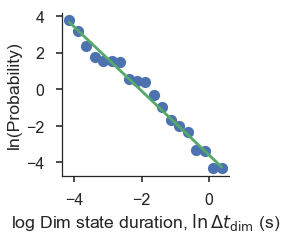

<Parameter 'C', value=-3.5978939355140813 +/- 0.134, bounds=[-inf:inf]>
<Parameter 'm', value=1.7527477119055801 +/- 0.0575, bounds=[-inf:inf]>
O:\User\Viva\analysis\blinker_analysis\taken-2018-06-01
2018-07-24,2018-06-01_blinking-statistics-4-22-2018.11,00am-4-22-2018.11,00am, 06, ND2,0.txt, 125.0 Hz,powfitloglog, dotted line


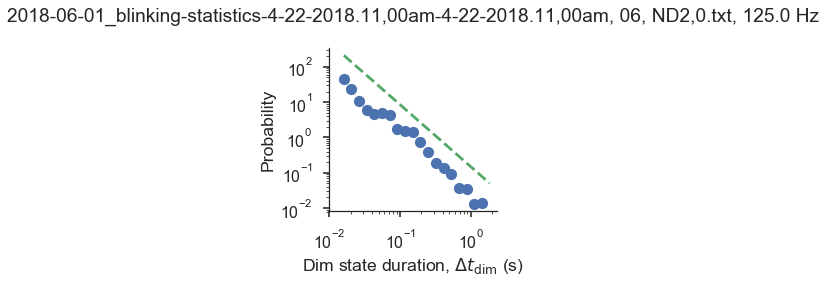

In [30]:
plt.plot(np.log(offbins), np.log(offprobs), 'o')
#plt.plot(np.log(offbins)[:-1], powlaw2result.init_fit, 'k--', alpha=.4)
plt.plot(np.log(offbins)[:-1], powlaw2result.best_fit, '-')

print(powlaw2result.fit_report())
xlabel('log Dim state duration, $\ln \, \Delta t_{\mathrm{dim}}$ (s)')
ylabel('ln(Probability)')
sns.despine()

plt.show()

print (powlaw2result.params['C'])
print (powlaw2result.params['m'])
 
# Why didn't this C value work?? Maybe a log vs ln thing
offfitpow_fromlog = powlaw(offfitx,                                  
                           C = .15,   # just set my own anyway. It looks good offset. #***
#                           C=-powlaw2result.params['C'].value,    
                           m=powlaw2result.params['m'].value)

figure()
loglog(offbins, offprobs, 'o')
loglog(offfitx,offfitpow_fromlog, '--' );
xlabel('Dim state duration, $\Delta t_{\mathrm{dim}}$ (s)')
ylabel('Probability');
title(filename+'\n')
sns.despine()
xlim(xmin=1e-2) #***

print os.getcwd()
savename = today + ',' + filename + ',powfitloglog, dotted line'
print savename
savefig(savename + '.pdf', bbox_inches='tight', dpi=200)
savefig(savename + '.png', bbox_inches='tight', dpi=200)

O:\User\Viva\analysis\blinker_analysis\taken-2018-06-01
2018-07-24,2018-06-01_blinking-statistics-4-22-2018.11,00am-4-22-2018.11,00am, 06, ND2,0.txt, 125.0 Hz,dim,powfitloglog, dotted line
<Parameter 'm', value=1.7527477119055801 +/- 0.0575, bounds=[-inf:inf]>


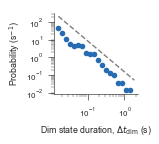

In [31]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set(style='ticks',rc={'axes.linewidth':0.6})
sns.set_context('paper',rc={'xtick.major.width':0.6,'ytick.major.width':0.6})
#sns.set_palette(sns.husl_palette(2,h=0.6,l=0.6,s=0.7))

figure(figsize=(1.5,1.5))
loglog(offbins, offprobs, 'o', color = thisQEcolordark)
loglog(offfitx,offfitpow_fromlog, '--', color='grey' );
xlabel('Dim state duration, $\Delta t_{\mathrm{dim}}$ (s)')
ylabel('Probability (s$^{-1}$)');
#title(filename+'\n')
sns.despine()
#xlim(xmin=1e-2) #***

print os.getcwd()
savename = today + ',' + filename + ',dim,powfitloglog, dotted line'
print savename
savefig(savename + '.pdf', bbox_inches='tight')
savefig(savename + '.svg', bbox_inches='tight')
savefig(savename + '.png', bbox_inches='tight', dpi=600)

print (powlaw2result.params['m']);

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


[[Model]]
    Model(mylinear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 19
    # variables        = 2
    chi-square         = 12.1263238
    reduced chi-square = 0.71331316
    Akaike info crit   = -4.53214709
    Bayesian info crit = -2.64326913
[[Variables]]
    C: -2.59277803 +/- 0.28271663 (10.90%) (init = 2)
    m:  1.30530965 +/- 0.12658843 (9.70%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, m) = -0.728



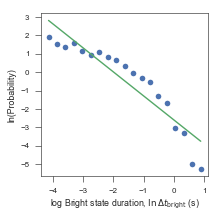

In [32]:
# need to cut out last datapoint to avoid error
powlawbrightresult = linearm.fit(data=np.log(onprobs)[:-1], t=np.log(onbins)[:-1], C=2,m=1)

plt.plot(np.log(onbins), np.log(onprobs), 'o')
#plt.plot(np.log(onbins)[:-1], powlawbrightresult.init_fit, 'k--', alpha=.4)
plt.plot(np.log(onbins)[:-1], powlawbrightresult.best_fit, '-')

print(powlawbrightresult.fit_report())
xlabel('log Bright state duration, $\ln \, \Delta t_{\mathrm{bright}}$ (s)')
ylabel('ln(Probability)')

plt.show()

onfitpow_fromlog = powlaw(onfitx,                                  
                           C=powlawbrightresult.params['C'],                                                       
                           m=powlawbrightresult.params['m'])


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


[[Model]]
    Model(mylinear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 19
    # variables        = 2
    chi-square         = 12.1263238
    reduced chi-square = 0.71331316
    Akaike info crit   = -4.53214709
    Bayesian info crit = -2.64326913
[[Variables]]
    C: -2.59277803 +/- 0.28271663 (10.90%) (init = 2)
    m:  1.30530965 +/- 0.12658843 (9.70%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, m) = -0.728



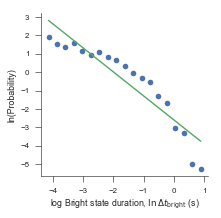

<Parameter 'C', value=-2.5927780324297087 +/- 0.283, bounds=[-inf:inf]>
<Parameter 'm', value=1.3053096539032334 +/- 0.127, bounds=[-inf:inf]>


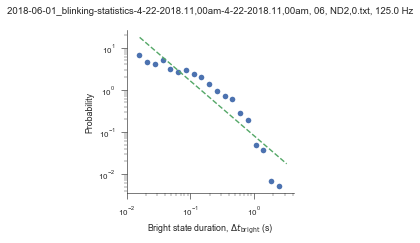

In [33]:
plt.plot(np.log(onbins), np.log(onprobs), 'o')
#plt.plot(np.log(onbins)[:-1], powlawbrightresult.init_fit, 'k--', alpha=.4)
plt.plot(np.log(onbins)[:-1], powlawbrightresult.best_fit, '-')

print(powlawbrightresult.fit_report())
xlabel('log Bright state duration, $\ln \, \Delta t_{\mathrm{bright}}$ (s)')
ylabel('ln(Probability)')
sns.despine()

plt.show()

print (powlawbrightresult.params['C'])
print (powlawbrightresult.params['m'])
 
# Why didn't this C value work?? Maybe a log vs ln thing
onfitpow_fromlog = powlaw(onfitx,                                  
                           C = .08,   # just set my own anyway. It looks good onset. #***
#                           C=-powlawbrightresult.params['C'].value,    
                           m=powlawbrightresult.params['m'].value)

figure()
loglog(onbins, onprobs, 'o')
loglog(onfitx,onfitpow_fromlog, '--' );
xlabel('Bright state duration, $\Delta t_{\mathrm{bright}}$ (s)')
ylabel('Probability');
title(filename+'\n')
sns.despine()
xlim(xmin=1e-2) #***

"""
print os.getcwd()
savename = today + ',' + filename + ',bright,powfitloglog, dotted line'
print savename
savefig(savename + '.pdf', bbox_inches='tight', dpi=200)
savefig(savename + '.png', bbox_inches='tight', dpi=200
""";

O:\User\Viva\analysis\blinker_analysis\taken-2018-06-01
2018-07-24,2018-06-01_blinking-statistics-4-22-2018.11,00am-4-22-2018.11,00am, 06, ND2,0.txt, 125.0 Hz,bright,powfitloglog, dotted line
<Parameter 'm', value=1.3053096539032334 +/- 0.127, bounds=[-inf:inf]>


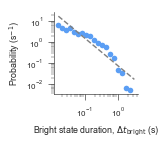

In [34]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set(style='ticks',rc={'axes.linewidth':0.6})
sns.set_context('paper',rc={'xtick.major.width':0.6,'ytick.major.width':0.6})
sns.set_palette(sns.husl_palette(2,h=0.6,l=0.6,s=0.7))

figure(figsize=(1.5,1.5))
loglog(onbins, onprobs, 'o', color = thisQEcolorlight)
loglog(onfitx,onfitpow_fromlog, '--', color='grey' );
xlabel('Bright state duration, $\Delta t_{\mathrm{bright}}$ (s)')
ylabel('Probability (s$^{-1}$)');
#title(filename+'\n')
sns.despine()
#xlim(xmin=1e-2) #***

print os.getcwd()
savename = today + ',' + filename + ',bright,powfitloglog, dotted line'
print savename
savefig(savename + '.pdf', bbox_inches='tight')
savefig(savename + '.svg', bbox_inches='tight')
savefig(savename + '.png', bbox_inches='tight', dpi=600)

print (powlawbrightresult.params['m']);

In [35]:
powlaw2result.params['m'].value

1.7527477119055801

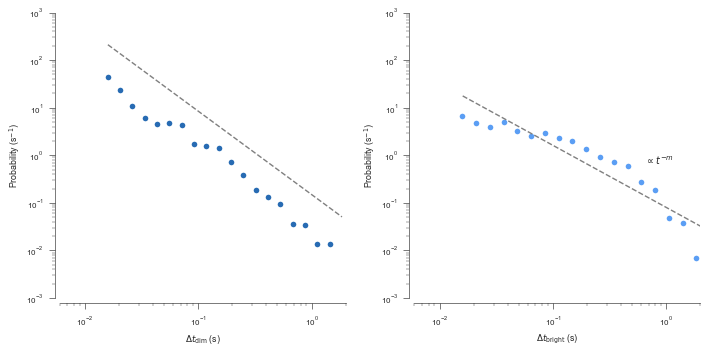

In [36]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set(style='ticks',rc={'axes.linewidth':0.6})
sns.set_context('paper',rc={'xtick.major.width':0.6,'ytick.major.width':0.6})
#sns.set_palette(sns.husl_palette(2,h=0.6,l=0.6,s=0.7))

figure(figsize=(10,5))

subplot(1,2,1)
loglog(offbins, offprobs, 'o', color = thisQEcolordark)
loglog(offfitx,offfitpow_fromlog, '--', color='grey' );
#xlabel('Dim state duration, $\Delta t_{\mathrm{dim}}$ (s)')
xlabel('$\Delta t_{\mathrm{dim}}$ (s)')
ylabel('Probability (s$^{-1}$)');
#title(filename+'\n')
sns.despine()
xlim(xmin=.6e-2,xmax=2) #***
ylim(1e-3,ymax=1e3)

subplot(1,2,2)
loglog(onbins, onprobs, 'o', color = thisQEcolorlight)
loglog(onfitx,onfitpow_fromlog, '--', color='grey' );
#xlabel('Bright state duration, $\Delta t_{\mathrm{bright}}$ (s)')
xlabel('$\Delta t_{\mathrm{bright}}$ (s)')
ylabel('Probability (s$^{-1}$)');
#title(filename+'\n')
sns.despine(offset =5)
xlim(xmin=.6e-2,xmax=2) #***
ylim(1e-3,ymax=1e3)

plt.text(.65, 0.65, r'$\propto t^{-m}$')
plt.tight_layout()

"""
print os.getcwd()
savename = today + ',' + filename + ',dim,powfitloglog, dotted line'
print savename
savefig(savename + '.pdf', bbox_inches='tight')
savefig(savename + '.svg', bbox_inches='tight')
savefig(savename + '.png', bbox_inches='tight', dpi=600)

print (powlaw2result.params['m']);
""";

In [37]:
print (powlaw2result.params['m']);
print (powlawbrightresult.params['m']);


<Parameter 'm', value=1.7527477119055801 +/- 0.0575, bounds=[-inf:inf]>
<Parameter 'm', value=1.3053096539032334 +/- 0.127, bounds=[-inf:inf]>


<Parameter 'm', value=1.7527477119055801 +/- 0.0575, bounds=[-inf:inf]>
<Parameter 'm', value=1.3053096539032334 +/- 0.127, bounds=[-inf:inf]>
O:\User\Viva\analysis\blinker_analysis\taken-2018-06-01
2018-07-25,2018-06-01_blinking-statistics-4-22-2018.11,00am-4-22-2018.11,00am, 06, ND2,0.txt, 125.0 Hz,both,powfitloglog, dotted line


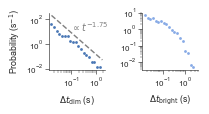

In [57]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set(style='ticks',rc={'axes.linewidth':0.6})
sns.set_context('paper',rc={'xtick.major.width':0.6,'ytick.major.width':0.6})
#sns.set_palette(sns.husl_palette(2,h=0.6,l=0.6,s=0.7))

figure(figsize=(3,1.68))

subplot(1,2,1)
loglog(offbins, offprobs, '.', color = thisQEcolordark)
loglog(offfitx,offfitpow_fromlog, '--', color='grey' );
#xlabel('Dim state duration, $\Delta t_{\mathrm{dim}}$ (s)')
xlabel('$\Delta t_{\mathrm{dim}}$ (s)')
ylabel('Probability (s$^{-1}$)');
#title(filename+'\n')
sns.despine()
#xlim(xmin=.6e-2,xmax=2) #***
#ylim(.3e-3,ymax=1e3)
#plt.xticks([.01,.1,1])
plt.yticks([1e-2,1e0,1e2])
gca().tick_params(axis='both', pad=2,length=4)
textx = 1e-1
texty = 1e1
plt.text(textx, texty, r'$\propto t^{-1.75}$', color='grey') #***


subplot(1,2,2)
loglog(onbins, onprobs, '.', color = thisQEcolorlight)
#loglog(onfitx,onfitpow_fromlog, '--', color='grey' );
#xlabel('Bright state duration, $\Delta t_{\mathrm{bright}}$ (s)')
xlabel('$\Delta t_{\mathrm{bright}}$ (s)')
#ylabel('Probability (s$^{-1}$)');
#title(filename+'\n')
sns.despine(offset =0)
#xlim(xmin=.6e-2,xmax=2) #***
#ylim(.3e-3,ymax=1e3)
#plt.xticks([.01,.1,1])
#plt.yticks([1e-3,1e0,1e3])
#gca().tick_params(labelleft='off')  
gca().tick_params(axis='both', pad=2,length=4)
gca().tick_params(axis='both', which='minor', pad=2,length=2)

#plt.text(textx, texty, r'$\propto t^{-2.02}$', color='grey') #***
plt.tight_layout()

print (powlaw2result.params['m']);
print (powlawbrightresult.params['m']);

print os.getcwd()
savename = today + ',' + filename + ',both,powfitloglog, dotted line'
print savename
savefig(savename + '.pdf', bbox_inches='tight')
savefig(savename + '.svg', bbox_inches='tight')
savefig(savename + '.png', bbox_inches='tight', dpi=600)


In [ ]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set(style='ticks',rc={'axes.linewidth':0.6})
sns.set_context('paper',rc={'xtick.major.width':0.6,'ytick.major.width':0.6})
#sns.set_palette(sns.husl_palette(2,h=0.6,l=0.6,s=0.7))

figure(figsize=(3,1.7))

loglog(offbins, offprobs, '.', color = thisQEcolordark, label="dim")
#loglog(offfitx,offfitpow_fromlog, '--', color='grey' );
#xlabel('Dim state duration, $\Delta t_{\mathrm{dim}}$ (s)')
xlabel('$\Delta t_{\mathrm{dim}}$ (s)')
ylabel('Probability (s$^{-1}$)');
#title(filename+'\n')
sns.despine()
xlim(xmin=.6e-2,xmax=2) #***
ylim(.3e-3,ymax=1e3)
plt.xticks([.01,.1,1])
plt.yticks([1e-3,1e0,1e3])
gca().tick_params(axis='both', pad=2,length=4)
textx = .5e-1
texty = .7e2
#plt.text(textx, texty, r'$\propto t^{-2.06}$', color='grey') #***


loglog(onbins, onprobs, '.', color = thisQEcolorlight, label="bright")
loglog(onfitx,onfitpow_fromlog, '--', color='grey' );
#xlabel('Bright state duration, $\Delta t_{\mathrm{bright}}$ (s)')
xlabel('$\Delta t_{\mathrm{bright}}$ (s)')
#ylabel('Probability (s$^{-1}$)');
#title(filename+'\n')
sns.despine(offset =0)
#xlim(xmin=.6e-2,xmax=2) #***
#ylim(.3e-3,ymax=1e3)
#plt.xticks([.01,.1,1])
#plt.yticks([1e-3,1e0,1e3])
#gca().tick_params(labelleft='off')  
gca().tick_params(axis='both', pad=2,length=4)
plt.text(textx, texty, r'$\propto t^{-2.0}$', color='grey') #***
plt.tight_layout()

xlabel('State duration (s)')
legend()

print (powlaw2result.params['m']);
print (powlawbrightresult.params['m']);

print os.getcwd()
savename = today + ',' + filename + ',combined,powfitloglog, dotted line'
print savename
savefig(savename + '.pdf', bbox_inches='tight')
savefig(savename + '.svg', bbox_inches='tight')
savefig(savename + '.png', bbox_inches='tight', dpi=600)


In [49]:
assert len(CDFofftimes) == len(sortedofftimes)
len(sortedofftimes)

700

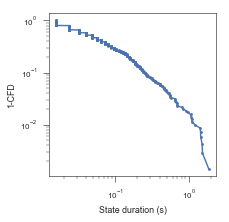

13.0911722934
[[Model]]
    Model(CDFtruncpow)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 700
    # variables        = 3
    chi-square         = 0.70810390
    reduced chi-square = 0.00101593
    Akaike info crit   = -4821.37134
    Bayesian info crit = -4807.71810
[[Variables]]
    C:    0.17656546 +/- 0.01309536 (7.42%) (init = 0.1)
    m:    1.22449947 +/- 0.02096853 (1.71%) (init = 1.5)
    tau:  0.47285478 +/- 0.03489631 (7.38%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, m)   = -0.996
    C(C, tau) = -0.982
    C(m, tau) =  0.962



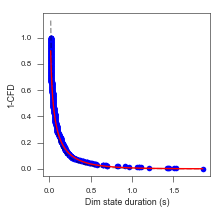

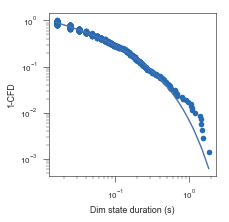

NameError: name 'offfitpow_fromCDF' is not defined

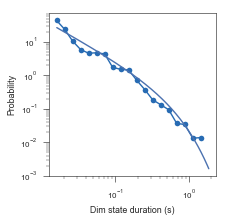

In [50]:
# Fit truncated power law to CDF

figure()
loglog(sortedofftimes,CDFofftimes, '.-', label='Dim state');
ylabel('1-CFD')
plt.xlabel('State duration (s)')
plt.show()

truncpowpars = lmfit.Parameters()
truncpowpars.add('C', value=.1, vary=True)
truncpowpars.add('m', value=1.5, vary=True) # should maybe have max 1, but seems to work better without.
truncpowpars.add('tau', value=.5, vary=True)

start = timer()
CDFtruncpowresult = CDFtruncpowm.fit(data=CDFofftimes, t=sortedofftimes, params=truncpowpars)
end = timer()
print (end-start)
print(CDFtruncpowresult.fit_report())
#print(CDFtruncpowresult.ci_report())

plt.plot(sortedofftimes, CDFofftimes, 'bo')

plt.plot(sortedofftimes, CDFtruncpowresult.init_fit, 'k--', alpha=.4)
plt.plot(sortedofftimes, CDFtruncpowresult.best_fit, 'r-')
ylabel('1-CFD')
plt.xlabel('Dim state duration (s)')
plt.show()

#print(CDFtruncpowresult.fit_report())
#print(CDFtruncpowresult.ci_report())
figure()
plt.plot(sortedofftimes, CDFofftimes, 'o', color=thisQEcolordark)

#plt.plot(sortedofftimes, CDFtruncpowresult.init_fit, 'k--', alpha=.4)
plt.loglog(sortedofftimes, CDFtruncpowresult.best_fit, '-')
#ylim(ymin=1e-4)

ylabel('1-CFD')
plt.xlabel('Dim state duration (s)')

plt.show()

# Calculate curve from fit parameters
offfittruncpow_fromCDF = truncpow(t=offfitx,
                                  C=CDFtruncpowresult.params['C'],                     
                                  m=CDFtruncpowresult.params['m'],                      
                                  tau=CDFtruncpowresult.params['tau'])


# display off blinks
fig,ax1 = plt.subplots()
ax1.loglog(offbins,offprobs,'o-', label="Dim state", color=thisQEcolordark)
plt.xlabel('Dim state duration (s)')
plt.ylabel('Probability')
ax1.loglog(offfitx, offfittruncpow_fromCDF, label="truncated power law")
ax1.loglog(offfitx,offfitpow_fromCDF, label="dim state power law");


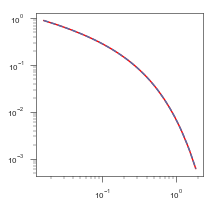

In [51]:
yprime = log(CDFtruncpow(t=offfitx,
                      C=CDFtruncpowresult.params['C'],
                      m=CDFtruncpowresult.params['m'],
                      tau=CDFtruncpowresult.params['tau'] ))

#plt.plot(log(offfitx),yprime)
figure()
plt.loglog(sortedofftimes, CDFtruncpowresult.best_fit, 'r-')
plt.loglog(offfitx,exp(yprime), '--')


In [ ]:
"""
# Attempt to fit CDF truc power law on log scale.
assert set(isnan(log(CDFofftimes))) == {False}
assert set(isnan(sortedofftimes)) == {False}
assert set(isnan(truncpowpars)) == {False}

truncpowpars = lmfit.Parameters()
truncpowpars.add('C', value=2, vary=True)
truncpowpars.add('m', value=.1, vary=True) # should maybe have max 1
truncpowpars.add('tau', value=1, vary=True)

CDFtruncpowresult2 = logCDFtrucpowm.fit(data=log(CDFofftimes), t=sortedofftimes, params=truncpowpars)
print(CDFtruncpowresult2.fit_report())
""";

In [52]:
showexpfit = False
showpowfit = False
showtruncpowfit = True



### ==== FITS ====

# on time exponential fit, not truncated
onparamexp, onpcovexp = curve_fit(expfit, onbins, onprobs,p0 = (30, 2))
onfitexp = expfit(onfitx,onparamexp[0],onparamexp[1])

# on time power law fit, not truncated
onparampow, onpcovpow = curve_fit(powlaw, onbins, onprobs,p0 = (2, 1))
onfitpow = powlaw(onfitx,onparampow[0],onparampow[1])

# on time power law fit to CDF
onparampow_fromCDF, onpcovpow_fromCDF = curve_fit(CDFpowlaw, sortedontimes,CDFontimes,p0 = onparampow)
onfitpow_fromCDF = powlaw(onfitx,onparampow_fromCDF[0],onparampow_fromCDF[1])
onfitpowCDF = CDFpowlaw(onfitx,onparampow_fromCDF[0],onparampow_fromCDF[1])

"""
# on time truncated power law fit to CDF
onparamtruncpow_fromCDF, onpcovtruncpow_fromCDF = curve_fit(CDFtruncpow, 
                                                            sortedontimes,
                                                            CDFontimes)
onfittruncpow_fromCDF = truncpow(onfitx,
                                 onparamtruncpow_fromCDF[0],
                                 onparamtruncpow_fromCDF[1],
                                 onparamtruncpow_fromCDF[2])
onfittruncpowCDF = CDFtruncpow(onfitx,
                               onparamtruncpow_fromCDF[0],
                               onparamtruncpow_fromCDF[1],
                               onparamtruncpow_fromCDF[2])
"""

# off time exponential fit, not truncated
offparamexp, offpcovexp = curve_fit(expfit, offbins, offprobs,p0 = (30, 2))
offfitexp = expfit(offfitx,offparamexp[0],offparamexp[1])

# off time power law fit, not truncated
start = timer()
offparampow, offpcovpow = curve_fit(powlaw, offbins, offprobs,p0 = (2, 1))
end = timer()
print(end-start)
offfitpow = powlaw(offfitx,offparampow[0],offparampow[1])

# off time power law fit to CDF
offparampow_fromCDF, offpcovpow_fromCDF = curve_fit(CDFpowlaw, sortedofftimes,CDFofftimes,p0 = offparampow)
offfitpow_fromCDF = powlaw(offfitx,offparampow_fromCDF[0],offparampow_fromCDF[1])
offfitpowCDF = CDFpowlaw(offfitx,offparampow_fromCDF[0],offparampow_fromCDF[1])


# off time truncated power law fit to CDF
offparamtruncpow_fromCDF, offpcovtruncpow_fromCDF = curve_fit(CDFtruncpow, 
                                                              sortedofftimes,
                                                              CDFofftimes)
offfittruncpow_fromCDF = truncpow(offfitx,
                                  offparamtruncpow_fromCDF[0],
                                  offparamtruncpow_fromCDF[1],
                                  offparamtruncpow_fromCDF[2])
offfittruncpowCDF = CDFtruncpow(offfitx,
                                offparamtruncpow_fromCDF[0],
                                offparamtruncpow_fromCDF[1],
                                offparamtruncpow_fromCDF[2])
                                

### ===  display fits ===

fig,ax1 = plt.subplots()
ax1.plot(offbins,offprobs,'.-', label='data')
plt.xlabel('Dim state duration (s)')
plt.ylabel('Probability')
#ax1.set_yscale('symlog', linthreshy=1)
if showexpfit:
    ax1.plot(offfitx,offfitexp, label='exponential fit')
if showpowfit:
    ax1.plot(offfitx, offfitpow, label= 'power law fit')
    ax1.plot(offfitx, offfitpow_fromCDF, label= 'power law fit (from CDF)')
if showtruncpowfit:
    ax1.plot(offfitx, offfittruncpow_fromCDF, label='truncated power law')
plt.title(filename)
plt.legend()
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(offbins,offprobs,'.-', label='data')
plt.xlabel('Dim state duration (s)')
plt.ylabel('Probability')
#ax1.set_yscale('symlog', linthreshy=1)
if showexpfit:
    ax1.plot(offfitx,offfitexp, label='exponential fit')
if showpowfit:
    ax1.plot(offfitx, offfitpow, label= 'power law fit')
    ax1.plot(offfitx, offfitpow_fromCDF, label= 'power law fit (from CDF)')
if showtruncpowfit:
    ax1.plot(offfitx, offfittruncpow_fromCDF, label='truncated power law')
plt.title(filename)
plt.legend()
ax1.set_yscale('log', linthreshy=1)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(offbins,offprobs,'.-', label='data')
plt.xlabel('Dim state duration (s)')
plt.ylabel('Probability')
#ax1.set_yscale('log')
if showexpfit:
    ax1.plot(offfitx,offfitexp, label='exponential fit')
if showpowfit:
    ax1.plot(offfitx, offfitpow, label= 'power law fit')
    ax1.plot(offfitx, offfitpow_fromCDF, label= 'power law fit (from CDF)')
if showtruncpowfit:
    ax1.plot(offfitx, offfittruncpow_fromCDF, label='truncated power law')
plt.title(filename)
plt.legend()
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.show()

figure() # display CDF
sortedontimes,CDFontimes=CDF(ontimes)
sortedofftimes,CDFofftimes=CDF(offtimes)
loglog(sortedontimes,CDFontimes, '.-', label='Bright state');
if showpowfit:
    plot(onfitx,onfitpowCDF, label='Bright state power law fit')
if showtruncpowfit:
    plot(offfitx, onfittruncpowCDF, label='Bright truncated power law')
loglog(sortedofftimes,CDFofftimes, '.-', label='Dim state');
if showpowfit:
    plot(offfitx, offfitpowCDF, label='Dim state power law fit')
if showtruncpowfit:
    plot(offfitx, offfittruncpowCDF, label='dim truncated power law')
xlabel('State duration (s)');
ylabel('1-CDF')
title(filename + '\nCumulative distribution function');
legend();

figure() # display CDF
loglog(sortedontimes,[1-c for c in CDFontimes], '.-', label='Bright state');
if showpowfit:
    plot(onfitx,[1-p for p in onfitpowCDF], label='Bright state power law fit')
loglog(sortedofftimes,[1-c for c in CDFofftimes], '.-', label='Dim state');
if showpowfit:
    plot(offfitx, [1-p for p in offfitpowCDF], label='Dim state power law fit')
xlabel('State duration (s)');
ylabel('CDF')
title(filename + '\nCumulative distribution function');
legend();


# === BRIGHT STATE fit params ===
figure(figsize=(1,6))
plt.imshow(abs(onpcovexp), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, exp fit, bright state, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong on-diagonal values.")

figure(figsize=(1,6))
plt.imshow(abs(onpcovexp), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, pow fit, bright state, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong on-diagonal values.")

print 'Exponential fit:'
print  'on Coefficient A_bright = ' + str(onparamexp[0]) + ' ± ' + str(np.sqrt(onpcovexp[0,0]))
print 'time constant tau_bright = ' + str(onparamexp[1]) + ' ± ' + str(np.sqrt(onpcovexp[1,1])) + ' sec'

print 'Power law:'
print  'on Coefficient C_bright = ' + str(onparampow[0]) + ' ± ' + str(np.sqrt(onpcovpow[0,0]))
print 'logarithmic slope m_bright = ' + str(onparampow[1]) + ' ± ' + str(np.sqrt(onpcovpow[1,1]))

print 'Power law (from CDF):'
print  'on Coefficient C_bright = ' + str(onparampow_fromCDF[0]) + ' ± ' + str(np.sqrt(onpcovpow_fromCDF[0,0]))
print 'logarithmic slope m_bright = ' + str(onparampow_fromCDF[1]) + ' ± ' + str(np.sqrt(onpcovpow_fromCDF[1,1]))

# === DIM STATE fit params ===
figure(figsize=(1,6))
plt.imshow(abs(offpcovexp), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, exp fit, dim state, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong off-diagonal values.")

figure(figsize=(1,6))
plt.imshow(abs(offpcovexp), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, pow fit, dim state, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong off-diagonal values.")

print 'Exponential fit:'
print  'off Coefficient A_dim = ' + str(offparamexp[0]) + ' ± ' + str(np.sqrt(offpcovexp[0,0]))
print 'time constant tau_dim = ' + str(offparamexp[1]) + ' ± ' + str(np.sqrt(offpcovexp[1,1])) + ' sec'

print 'Power law:'
print  'off Coefficient C_dim = ' + str(offparampow[0]) + ' ± ' + str(np.sqrt(offpcovpow[0,0]))
print 'logarithmic slope m_dim = ' + str(offparampow[1]) + ' ± ' + str(np.sqrt(offpcovpow[1,1]))

print 'Power law (from CDF):'
print  'off Coefficient C_dim = ' + str(offparampow_fromCDF[0]) + ' ± ' + str(np.sqrt(offpcovpow_fromCDF[0,0]))
print 'logarithmic slope m_dim = ' + str(offparampow_fromCDF[1]) + ' ± ' + str(np.sqrt(offpcovpow_fromCDF[1,1]))


0.00196978101047


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [ ]:
# Save figures

# mpl.rcParams['figure.dpi'] = 200

font = {'size'   : 22}
plt.rc('font', **font)

# display off blinks
fig,ax1 = plt.subplots()
ax1.loglog(offbins,offprobs,'o-', label="Dim state")
plt.xlabel('Dim state duration (s)')
plt.ylabel('Probability')
ax1.loglog(offfitx,offfitpow_fromCDF, label="dim state power law")

#ploteveryfig(fig,ax1,today + ',' + filename+',offblinks' + infostr,offfitx,offfitpow_fromCDF, save=True)

# On blinks
#fig,ax1 = plt.subplots()
ax1.loglog(onbins,onprobs,'o-', label="Bright state")
plt.xlabel('State duration (s)')
plt.ylabel('Probability')
plt.title(filename)
sns.despine()
ax1.loglog(onfitx,onfitpow_fromCDF, label="bright state power law")
legend()
#ploteveryfig(fig,ax1,today + ',' + filename+',onblinks' + infostr,onfitx,onfitpow_fromCDF, save=True)


print os.getcwd()
savename = today + ',' + filename + ',powfitfromCDF,loglog'
print savename
savefig(savename + '.pdf', bbox_inches='tight', dpi=200)
savefig(savename + '.png', bbox_inches='tight', dpi=200)
plt.show()

print 'Bright state: Power law (from CDF):'
print  'Coefficient C_bright = ' + str(onparampow_fromCDF[0]) + ' ± ' + str(np.sqrt(onpcovpow_fromCDF[0,0]))
print 'logarithmic slope m_bright = ' + str(onparampow_fromCDF[1]) + ' ± ' + str(np.sqrt(onpcovpow_fromCDF[1,1]))

print 'Dim state: Power law (from CDF):'
print  'Coefficient C_dim = ' + str(offparampow_fromCDF[0]) + ' ± ' + str(np.sqrt(offpcovpow_fromCDF[0,0]))
print 'logarithmic slope m_dim = ' + str(offparampow_fromCDF[1]) + ' ± ' + str(np.sqrt(offpcovpow_fromCDF[1,1]))

In [ ]:
print(CDFtruncpowresult.fit_report())
#print(CDFtruncpowresult.ci_report())

plt.plot(sortedofftimes, CDFofftimes, 'bo')

#plt.plot(sortedofftimes, CDFtruncpowresult.init_fit, 'k--', alpha=.4)
plt.loglog(sortedofftimes, CDFtruncpowresult.best_fit, 'r-')
#ylim(ymin=1e-4)

ylabel('1-CFD')
plt.xlabel('Dim state duration (s)')

plt.show()

# Calculate curve from fit parameters
offfittruncpow_fromCDF = truncpow(t=offfitx,
                                  C=CDFtruncpowresult.params['C'],                     
                                  m=CDFtruncpowresult.params['m'],                      
                                  tau=CDFtruncpowresult.params['tau'])


# display off blinks
fig,ax1 = plt.subplots()
ax1.loglog(offbins,offprobs,'o-', label="Dim state")
plt.xlabel('Dim state duration (s)')
plt.ylabel('Probability')
ax1.loglog(offfitx, offfittruncpow_fromCDF, label="truncated power law")
ax1.loglog(offfitx,offfitpow_fromCDF, label="dim state power law");


In [ ]:
from collections import OrderedDict
from IPython.display import display

onsavename = today + ',' + filename + ',powfitfromCDF,on.csv'
offsavename = today + ',' + filename + ',powfitfromCDF,off.csv'

onparamsdf = pd.DataFrame(OrderedDict([('file', filename),
                ('C',onparampow_fromCDF[0]), 
                ('C_unc', np.sqrt(onpcovpow_fromCDF[0,0])), 
                ('m', onparampow_fromCDF[1]), 
                ('m_unc',np.sqrt(onpcovpow_fromCDF[1,1]))]), index = [0])
display(onparamsdf)
onparamsdf.to_csv(onsavename)
print onsavename

offparamsdf = pd.DataFrame(OrderedDict([('file', filename),
                ('C',offparampow_fromCDF[0]), 
                ('C_unc', np.sqrt(offpcovpow_fromCDF[0,0])), 
                ('m', offparampow_fromCDF[1]), 
                ('m_unc',np.sqrt(offpcovpow_fromCDF[1,1]))]), index = [0])
display(offparamsdf)
offparamsdf.to_csv(offsavename)
print offsavename

os.getcwd()

In [ ]:
print 'Exp [A, tau]'
print offparamexp
print onparamexp

print 'Pow [C, m]'
print offparampow
print onparampow

print 'Pow,CDF [C, m]'
print offparampow_fromCDF
print onparampow_fromCDF